In [92]:
!pip install tensorflow

In [93]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data() 

In [95]:
print("Train Sample",X_train.shape,y_train.shape)
print("Test Sample",X_test.shape,y_test.shape)

Train Sample (50000, 32, 32, 3) (50000, 1)
Test Sample (10000, 32, 32, 3) (10000, 1)


In [96]:
NUM_CLASSES = 10
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

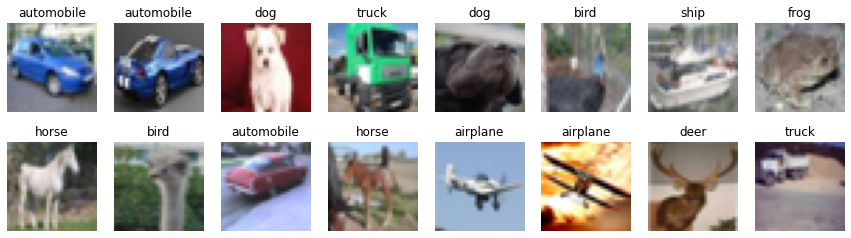

In [97]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2*cols-1,2.5*rows-1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0,len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(X_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [98]:
X_train2 = X_train/255.0
X_test2 = X_test/255.0

y_train2 = keras.utils.to_categorical(y_train,num_classes=10)
y_test2 = keras.utils.to_categorical(y_test,num_classes=10)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Activation,Dropout


In [118]:
def make_model():
  model = Sequential()
  model.add(Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  return model


In [119]:
model = make_model()
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 16, 16, 64)      

In [120]:
init_lr = 5e-3
batch_size = 32
epochs =15
model = make_model()
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),
              metrics = ['accuracy']
              )

In [121]:
model.fit(X_train2,y_train2,
          batch_size = batch_size,
          epochs=epochs,
          validation_data = (X_test2,y_test2),
          verbose=1,
          shuffle=True
          )

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7215 - accuracy: 0.3609 - val_loss: 1.1448 - val_accuracy: 0.5934
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0605 - accuracy: 0.6209 - val_loss: 0.8866 - val_accuracy: 0.6859
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8443 - accuracy: 0.7025 - val_loss: 0.8205 - val_accuracy: 0.7173
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7115 - accuracy: 0.7493 - val_loss: 0.7482 - val_accuracy: 0.7389
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6230 - accuracy: 0.7801 - val_loss: 0.7685 - val_accuracy: 0.7356
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5522 - accuracy: 0.8042 - val_loss: 0.7242 - val_accuracy: 0.7567
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4898 - accuracy: 0.8274 - val_loss: 0.7173 - val_ac

In [129]:
 y_pred_test = model.predict_proba(X_test2)
 y_pred_test_classes = np.argmax(y_pred_test,axis=1)
 y_pred_max_class = np.max(y_pred_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


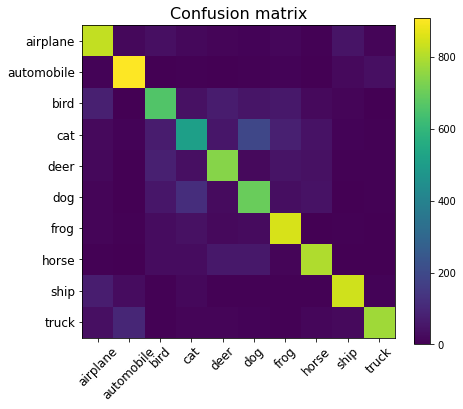

Test accuracy: 0.7621


In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))